<a href="https://colab.research.google.com/github/SubhraSMukherjee/Multi_Criteria_Decision_Making/blob/main/MCDM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Envelopment Analysis (DEA)

### Install and Import Dependencies

In [ ]:
!pip install Pyfrontier
!pip install topsispy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 86.2 MB/s eta 0:00:00


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

from Pyfrontier.frontier_model import EnvelopDEA,MultipleDEA
import topsispy as tp

---

### Load Data from source Google Drive

In [ ]:
import gspread
import pandas as pd
from google.auth import default
from google.colab import auth
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)
spreadsheet = gc.open_by_key('1y02VLScFwpvSgQk7Mh8Fn7W8L9jT5U2P41Jk-lAVR1Y')
#https://docs.google.com/spreadsheets/d/1y02VLScFwpvSgQk7Mh8Fn7W8L9jT5U2P41Jk-lAVR1Y/edit?gid=0#gid=0
worksheet = spreadsheet.get_worksheet(1)
df = pd.DataFrame(worksheet.get()).convert_dtypes()
df.columns = df.iloc[0]
df = df.drop(0).head(15)
df

,IP,Cost of Collaboration,"Ease of Collaboration (1 = best, 10 worst)",Time Taken for Negotiations (in Months),Reach,Affinity with Client
1,IP1,86,7,5,95,33
2,IP2,75,2,9,84,4
3,IP3,35,8,5,97,30
4,IP4,58,2,10,95,14
5,IP5,59,5,8,98,12
6,IP6,12,8,5,98,48
7,IP7,48,10,8,82,14
8,IP8,24,9,10,90,11
9,IP9,27,10,10,87,7
10,IP10,82,6,12,77,49


>### Data Envelopment Analysis Formulation

>\begin{align}
        \theta^* = \min \theta, \text{subject to} \\
        \sum_{j=1}^{n} \lambda_j x_{i, j} \leq \theta x_{i, o}, \quad i=1,2, \dots, m; \\
        \sum_{j=1}^{n} \lambda_j y_{r, j} \geq y_{r, o}, \quad r=1,2, \dots, s; \\
        \sum_{j=1}^{n} \lambda_j = 1 \\
        \lambda_j \geq 0, \quad j=1,2, \dots, n.\\
        \\
        where :DMU_o \ represents \ one \ of \ the \ n \ DMUs \ under \ evaluation, \\
        and \ x_{i, o} \ and \ y_{r, o} \ are \ the \ i{th} \ input \ r{th} \ output
  \end{align}

In [ ]:
for column in df.columns:
  if column not in ('IP','Score'):
    df[column] = df[column].astype(int)

## Final DEA Scores

In [ ]:
dea = EnvelopDEA("CRS", "in")
dea.fit(
    df[['Cost of Collaboration', 'Ease of Collaboration (1 = best, 10 worst)','Time Taken for Negotiations (in Months)']].to_numpy(),
    df[['Reach', 'Affinity with Client']].to_numpy(),
)

dea_score_vector = [dea.result[id].score for id in range(df.shape[0])]
df['DEA_Score'] = dea_score_vector
df

,IP,Cost of Collaboration,"Ease of Collaboration (1 = best, 10 worst)",Time Taken for Negotiations (in Months),Reach,Affinity with Client,DEA_Score
1,IP1,86,7,5,95,33,0.821249
2,IP2,75,2,9,84,4,0.527232
3,IP3,35,8,5,97,30,0.883645
4,IP4,58,2,10,95,14,0.539773
5,IP5,59,5,8,98,12,0.626263
6,IP6,12,8,5,98,48,1.000000
7,IP7,48,10,8,82,14,0.490631
8,IP8,24,9,10,90,11,0.517598
9,IP9,27,10,10,87,7,0.462553
10,IP10,82,6,12,77,49,0.650814


### Frontier Visualization

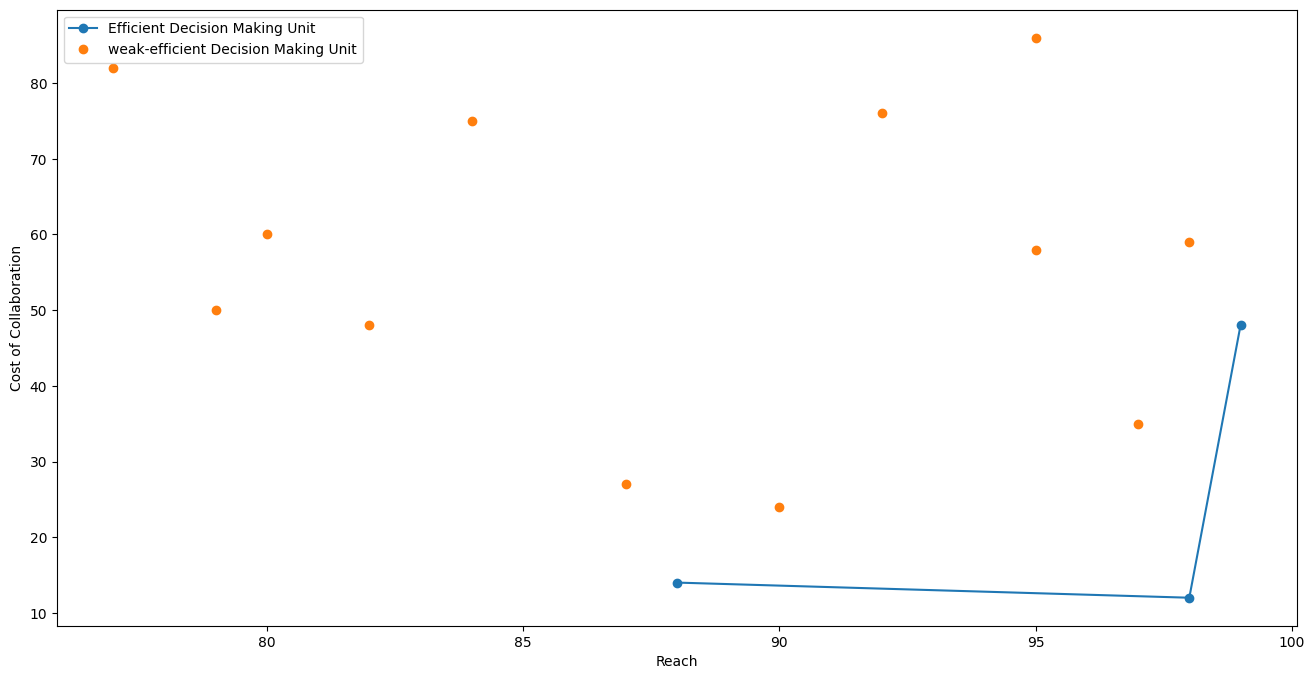

In [ ]:
effcient_dmu = [result.dmu for result in dea.result if result.score == 1]
weak_eff_dmu = [result.dmu for result in dea.result if result.score < 1 and result.has_slack]

plt.figure(figsize=(16, 8))
plt.plot(
    [d.output[0] for d in sorted(effcient_dmu, key=lambda dmu: dmu.output[0])],
    [d.input[0] for d in sorted(effcient_dmu, key=lambda dmu: dmu.output[0])],
    "-o",
    label="Efficient Decision Making Unit",
)
plt.plot(
    [d.output[0] for d in weak_eff_dmu],
    [d.input[0] for d in weak_eff_dmu],
    "o",
    label="weak-efficient Decision Making Unit",
)
plt.plot(linestyle="--", color="blue")
plt.ylabel(df.columns[1])
plt.xlabel( df.columns[4])
plt.legend()
plt.show()

## Technique for Order Preference by Similarity to Ideal Solution (TOPSIS)

In [ ]:
worksheet = spreadsheet.get_worksheet(0)
df = pd.DataFrame(worksheet.get()).convert_dtypes()
df.columns = df.iloc[0]
df = df.drop(0).head(16)
weights = list(map(float,df.iloc[-1].values[1:]))
df = df.drop(df[(df.IP == 'Weights Used')].index)
df

weights = list(map(float,df.iloc[-1].values[1:]))
sign = [-1, -1, -1, 1, 1]  #Manually set based on Inputs & Output Columns

In [ ]:
df[['Cost of Collaboration', 'Ease of Collaboration (1 = best, 10 worst)','Time Taken for Negotiations (in Months)','Reach', 'Affinity with Client']].to_numpy()

array([['51', '4', '3', '76', '5'],
       ['99', '2', '4', '73', '13'],
       ['89', '8', '2', '81', '9'],
       ['91', '8', '2', '56', '12'],
       ['78', '9', '6', '92', '2'],
       ['94', '7', '8', '78', '14'],
       ['52', '3', '2', '45', '4'],
       ['91', '9', '1', '30', '8'],
       ['81', '2', '4', '51', '10'],
       ['96', '10', '5', '10', '13'],
       ['83', '7', '1', '18', '5'],
       ['95', '4', '3', '65', '1'],
       ['95', '7', '5', '11', '14'],
       ['66', '6', '4', '37', '9'],
       ['75', '6', '5', '22', '3']], dtype=object)

In [ ]:
df['Topsis_Score'] = tp.topsis(df[['Cost of Collaboration', 'Ease of Collaboration (1 = best, 10 worst)','Time Taken for Negotiations (in Months)','Reach', 'Affinity with Client']].to_numpy(),weights, sign)[1]

df

,IP,Cost of Collaboration,"Ease of Collaboration (1 = best, 10 worst)",Time Taken for Negotiations (in Months),Reach,Affinity with Client,Topsis_Score
1,IP1,51,4,3,76,5,0.870793
2,IP2,99,2,4,73,13,0.376353
3,IP3,89,8,2,81,9,0.464920
4,IP4,91,8,2,56,12,0.351325
5,IP5,78,9,6,92,2,0.588843
6,IP6,94,7,8,78,14,0.406321
7,IP7,52,3,2,45,4,0.707388
8,IP8,91,9,1,30,8,0.239794
9,IP9,81,2,4,51,10,0.437557
10,IP10,96,10,5,10,13,0.102578
